Murder Hornets 2021
KNN Clustering

In [8]:
import numpy as np
import nltk
import pandas as pd
nltk.download('stopwords')
# from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/allisonliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df = pd.read_csv('/Users/allisonliu/Desktop/MCM2021/data/2021_MCM_Problem_C_Data/2021MCMProblemC_DataSet.csv')

df_positive = df.loc[df['Lab Status'] == 'Positive ID']
df_negative = df.loc[df['Lab Status'] == 'Negative ID']

df_unprocessed = df.loc[df['Lab Status'] == 'Unprocessed']
df_unverified = df.loc[df['Lab Status'] == 'Unverified']

In [75]:
# TRAINING DATA SET
df_train = df_negative

In [160]:
# # Clustering the document with KNN classifier
# modelknn = KNeighborsClassifier(n_neighbors=5)
# modelknn.fit(X,y_train)
 
# Clustering the training 30 sentences with K-means technique
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=200, n_init=100)

text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', kmeans),
])
text_clf = text_clf.fit(df_negative['Notes'])
predictions = text_clf.predict(df_negative['Notes'])
df_predictions = df_negative.assign(predictions=predictions)


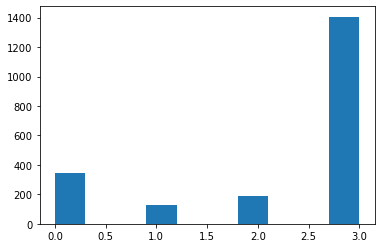

In [132]:
plt.hist(predictions)
plt.show()

In [133]:
### ATTEMPT TO OPTIMIZE K, OPTIMAL K AT THE ELBOW
# Sum_of_squared_distances = []
# K = range(1,30)
# for k in K:
#     km = KMeans(n_clusters=k, init='k-means++', max_iter=200, n_init=100)
#     text_clf = Pipeline([
#     ('vect', CountVectorizer(stop_words='english')),
#     ('tfidf', TfidfTransformer()),
#     ('clf', km),])
#     text_clf = text_clf.fit(df_negative['Notes'])
#     Sum_of_squared_distances.append(km.inertia_)

KeyboardInterrupt: 

In [ ]:
print(Sum_of_squared_distances)

In [ ]:
plt.plot(K, Sum_of_squared_distances)
plt.show()

In [150]:
count_vect = CountVectorizer(stop_words='english')
X_train_counts = count_vect.fit_transform(df_negative['Notes'])
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts) #matrix

In [152]:
### Print words and tokenized values

word2tfidf = dict(zip(count_vect.get_feature_names(), tfidf_transformer.idf_))
# for word, score in word2tfidf.items():
    # print(word, score)

In [153]:
from nltk.tokenize import word_tokenize
def word_process(string):
    # Import stopwords
    stopword_arr = nltk.corpus.stopwords.words('english')

    # Tokenize datafram column
    tokens = word_tokenize(string)
    # print(tokens)
    # print(type(tokens))

    # Iterate through words and remove stopwords, punctuation, and save as a lower case word
    words = []
    for word in tokens:
        if word.lower() not in stopword_arr and word.lower().isalpha():
                words.append(word.lower())
    return words


In [154]:

### PRINT WORDS IN EACH STATEMENT
def get_words_from_string(df, column_name):
    word_arr = np.zeros(len(df), dtype=object)
    # word_arr.astype('object')
    index = 0
    for i in df_negative.index:
        words = word_process(df.loc[i, column_name])
        # print(type(words))
        word_arr[index] = words
        index+=1
    return word_arr

In [155]:
df_negative['Notes']

6       I’m not sure what this is, but it was the bigg...
8       slow moving, i have this in the freezer still ...
9       It landed on my window while working. It walke...
12      Probably not an Asain Hornet but still a prett...
14      Was on the garden hose. It stung (maybe just a...
                              ...                        
4412       Super fast and kept banging in my sliding door
4419    I was walking on the selah cliffs trail and fo...
4420                           Flew away towards the west
4421    This insect was large enough to trigger home s...
4423                                                     
Name: Notes, Length: 2069, dtype: object

In [169]:
print(num_clusters)

4


In [172]:
from collections import Counter
### PRODUCE A LIST OF WORDS AND WORD COUNTS IN EACH CATEGORY THAT KMEANS SORTS INTO
word_arr = get_words_from_string(df_train, 'Notes')
df_predictions = df_negative.assign(predictions=predictions)
df_predictions['words']=word_arr

word_list = np.zeros(num_clusters, dtype=object)
word_counts = []
for n in range(num_clusters):
    df_temp = df_predictions[df_predictions['predictions'] == n]
    concat_array = []
    for entry in df_temp['words']:
        concat_array.append(entry)
    word_list[n]=concat_array
    word_list[n] = np.concatenate(word_list[n])
    counts = Counter(word_list[n]) #this is a dictionary
    word_counts.append(counts.most_common(10))


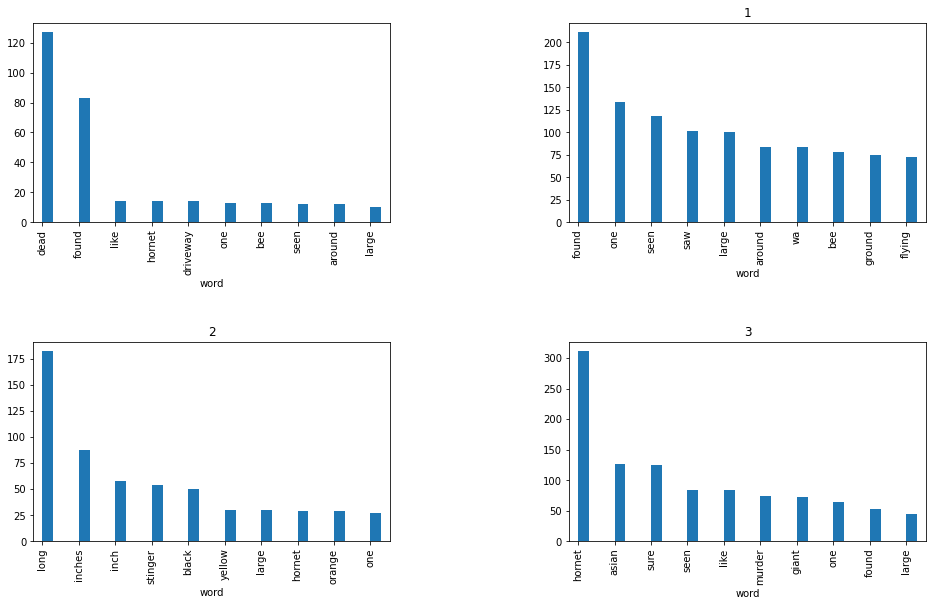

In [175]:
num_rows = 2
num_cols = 2
### num_rows and num_cols must add to num_clusters

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16,9))

wc = np.zeros(num_clusters, dtype=object)
### PLOT FREQUENCY OF COUNTS
for n in range(num_clusters):
    wc[n] = pd.DataFrame(word_counts[n], columns=['word', 'frequency'])

count = 0
for r in range(num_rows): #r and c must add to 4
    for c in range(num_cols):
        wc[count].plot(kind='bar', x='word', legend=None, ax=axs[r,c], align='edge', width=0.3, title=count)
        # ax.tick_params(axis='both', labelsize=12)
        count+=1

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.5   # the amount of width reserved for blank space between subplots
hspace = 0.6   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
plt.show()

In [42]:
wc[3]

,word,frequency
0,large,85
1,like,67
2,bee,64
3,black,52
4,orange,50
5,yellow,46
6,seen,44
7,hornet,37
8,insect,36
9,head,35


In [74]:
# Storing data in NumPy arrays
X = np.array(df_predictions['words'], dtype = object)
y = np.array(df_predictions['predictions'])

# Grabbing the first n samples
X = X[0:n,:]
X = X.reshape(X.shape[0], -1) #flattening to R^n vector
y1 = y[0:n]

# Calculating TSNE and PCA
print('Doing TSNE and PCA for MNIST...')
model_tsne = TSNE(n_components=2, random_state=0)
model_pca = PCA(n_components=2, random_state=0)
tsne = model_tsne.fit_transform(X)
pca = model_pca.fit_transform(X)

# Creating a plot of subplots for PCA and TSNE
plt.suptitle('MNIST')
plt.subplot(1, 2, 1)
plt.title('PCA')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
sns.scatterplot(x=pca[:,0],y=pca[:,1], hue=y1, palette=sns.color_palette("hls", 10), legend='full', alpha=0.5)
plt.subplot(1, 2, 2)
plt.title('TSNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
sns.scatterplot(x=tsne[:,0],y=tsne[:,1], hue=y1, palette=sns.color_palette("hls", 10), legend='full', alpha=0.5)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed